# The Hilbert curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

In [2]:
def hilbert_curve(order = 1):
    if order == 1:
        return np.array([-1, -1, 1, 1]), np.array([-1, 1, 1, -1])
    else:
        stride = 2 ** (order - 1)
        x, y = hilbert_curve(order-1)          
        return np.hstack((y - stride, x - stride, x + stride, -y + stride)), np.hstack((x - stride, y + stride, y + stride, -x - stride))      

In [5]:
from matplotlib import cm

In [47]:
def animate_hilbert_curve(order = 1, figsize=(10, 10), cmap = cm.plasma):
    fig = plt.figure(figsize = figsize)
    ax = plt.axes(xlim=(-2 ** order - 1, 2 ** order + 1), ylim=(-2 ** order - 1, 2 ** order + 1))
    line, = ax.plot([], [], lw=2)
    
    x,y = hilbert_curve(order = order)
    
    def init():
        # создение пустого графа.
        line.set_data([], [])
        return line,
    
    def animate(i):
        line.set_data(x[:i], y[:i])
        line.set_color(cmap(i / len(x)))
        return line, 
    
    # Скрываем лишние данные
    plt.axis('off')
    
    plt.title(f'Hilbert curve of order {order}')
 
    # Вызов анимации.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(x) + 1, interval= 20, blit=True)
    
    return anim

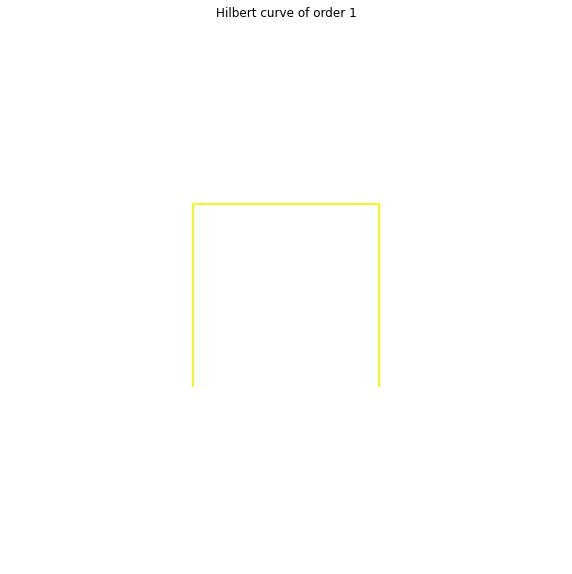

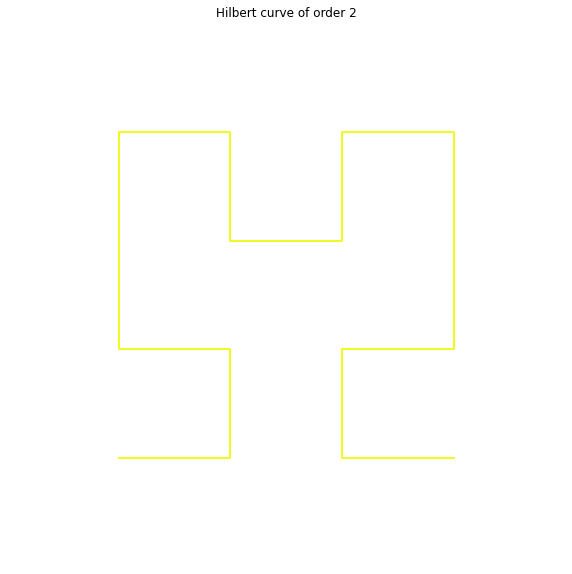

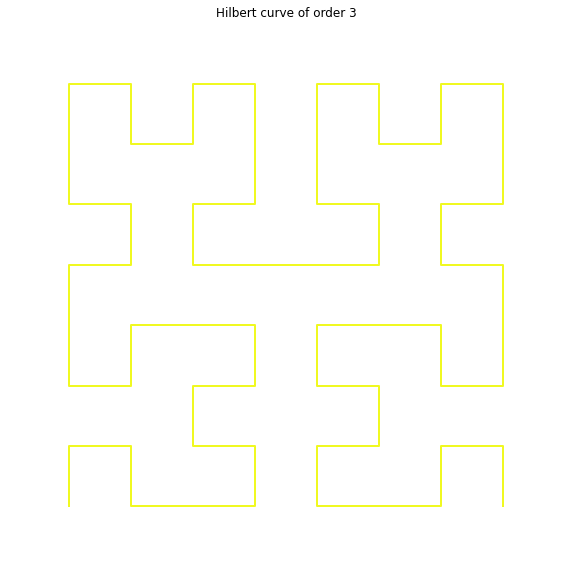

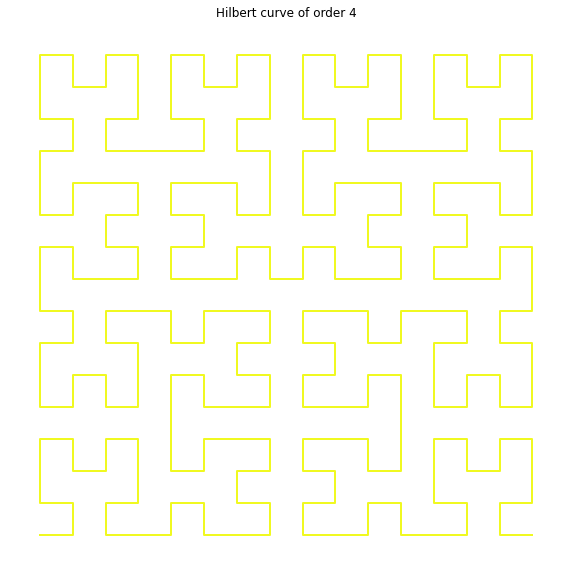

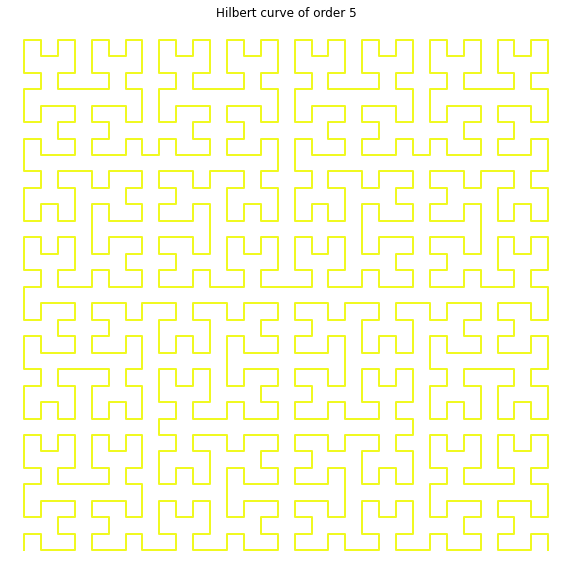

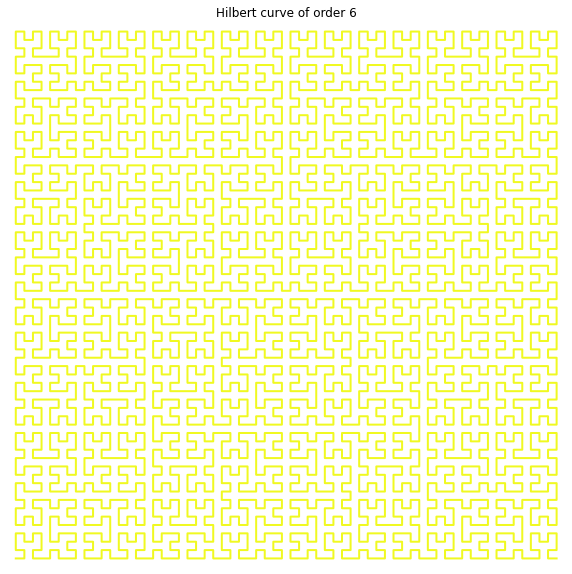

In [51]:
max_order = 6

with open('film_list.txt', 'a') as film_list:
    for order in range(1, max_order + 1):
        anim = animate_hilbert_curve(order = order)
        anim.save(f'hilbert_curve{order}.mp4', fps = int(10 * order ** 1.6))
        film_list.write(f"file hilbert_curve{order}.mp4\n")

#!ffmpeg -f concat -i film_list.txt -c copy hilbert_curves.mp4
#!rm 'hilbert_curve\d*.mp4'
!rm film_list.txt